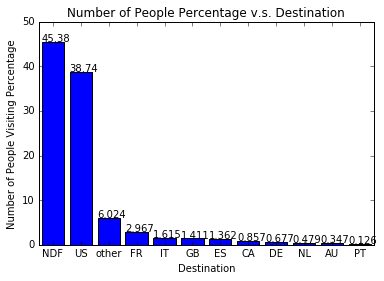

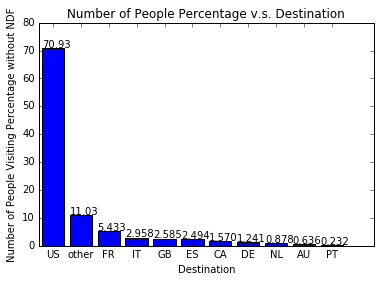

In [1]:
%matplotlib inline
import csv
from collections import Counter
import pandas
import matplotlib.pyplot as plt


with open('train_users_3.csv','rU') as f:
    reader = csv.reader(f, delimiter = ',')
    reader.next()
    cc = Counter(row[15] for row in reader)


countries = list()
num = list()
for des,count in cc.most_common():
        countries.append(des)
        num.append((count*100.0)/sum(cc.values()))

fig, ax = plt.subplots()
xaxis = [i + 0.1 for i,country in enumerate(countries)]
plt.bar(xaxis,num,0.8)
plt.ylabel("Number of People Visiting Percentage")
plt.xlabel("Destination")
plt.title("Number of People Percentage v.s. Destination")
plt.xticks([i + 0.5 for i,x in enumerate(countries)],countries)
for i, v in enumerate(num):
    ax.text(i + 0.1, v + 0.1, "%.5s" %str(v), color='black')
plt.show()

countries = list()
num = list()
del cc['NDF']
for des,count in cc.most_common():
        countries.append(des)
        num.append((count*100.0)/sum(cc.values()))

fig, ax = plt.subplots()
xaxis = [i + 0.1 for i,country in enumerate(countries)]
plt.bar(xaxis,num,0.8)
plt.ylabel("Number of People Visiting Percentage without NDF")
plt.xlabel("Destination")
plt.title("Number of People Percentage v.s. Destination")
plt.xticks([i + 0.5 for i,x in enumerate(countries)],countries)
for i, v in enumerate(num):
    ax.text(i + 0.1, v + 0.1, "%.5s" %str(v), color='black')
plt.show()




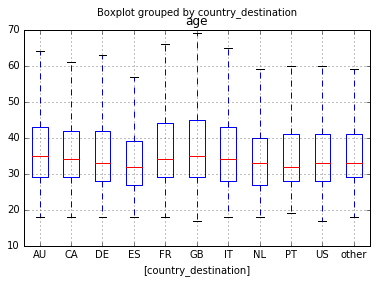

In [2]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# country_destination age plot
# If age is greater than 1000, assume it is the birth year
train = pd.read_csv('train_users_2.csv')
grpby = train.groupby(['id','country_destination'])['age'].sum().reset_index()
grpby = grpby.dropna(axis = 0)
ages =np.array(grpby['age'], dtype=np.float)
grpby['age']=np.where(ages > 1000,2015-ages,ages)
df = grpby.boxplot(by='country_destination',showfliers=False)
plt.show()

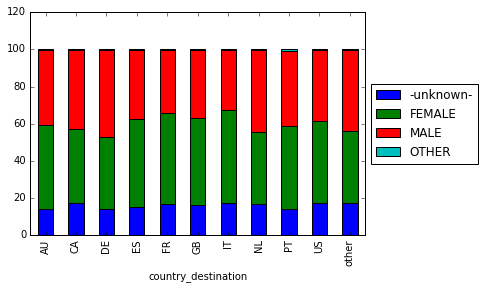

In [3]:
# country_destination gender distribution
des_gender= train.groupby(['country_destination','gender']).size()
des_gender_perc = des_gender.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
des_gender_perc.unstack().plot(kind = 'bar',stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

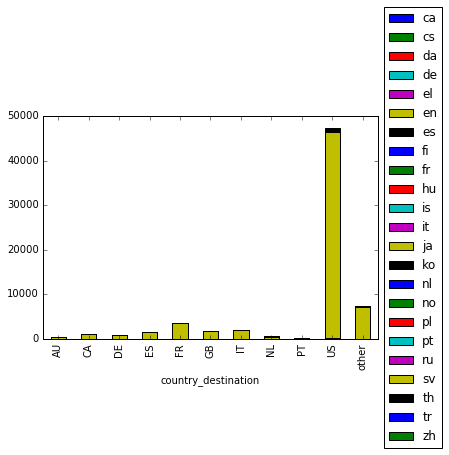

In [4]:
# country_destination language distribution
des_lan= train.groupby(['country_destination','language']).size()
des_lan_perc = des_lan.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
des_lan.unstack().plot(kind = 'bar',stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

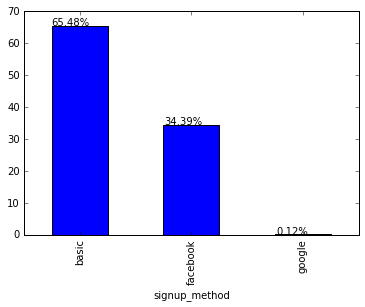

In [6]:
%matplotlib inline
#sign up method
signup = train.groupby(['signup_method']).size()
signup = signup.apply(lambda x: 100*x/float(signup.sum()))
ax = signup.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

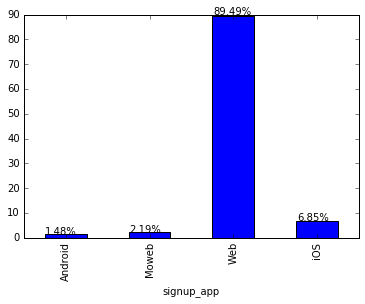

In [7]:
# sign up app
app = train.groupby(['signup_app']).size()
app = app.apply(lambda x: 100*x/float(app.sum()))
ax = app.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

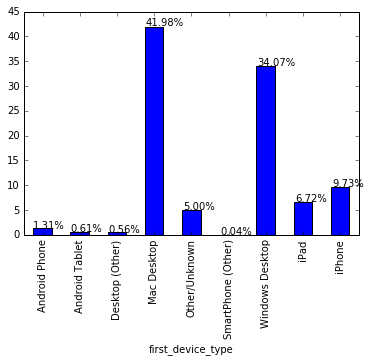

In [41]:
# first device type
device = train.groupby(['first_device_type']).size()
device = device.apply(lambda x: 100*x/float(device.sum()))
ax = device.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


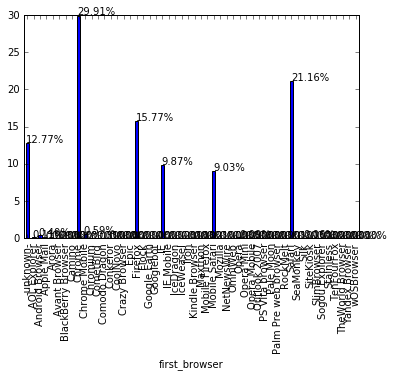

In [42]:
# first browser
brow = train.groupby(['first_browser']).size()
brow = brow.apply(lambda x: 100*x/float(brow.sum()))
ax = brow.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

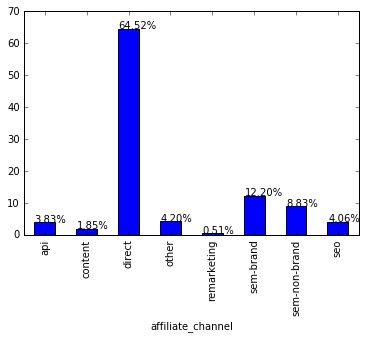

In [43]:
%matplotlib inline
# affiliate channel
channel = train.groupby(['affiliate_channel']).size()
channel = channel.apply(lambda x: 100*x/float(channel.sum()))
ax = channel.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

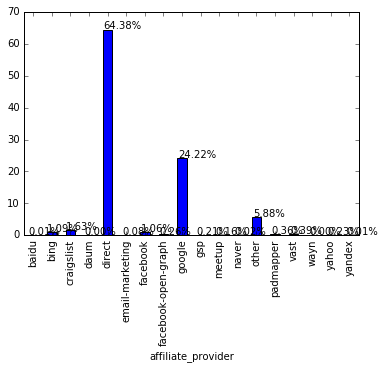

In [44]:
# affiliate provider
prov = train.groupby(['affiliate_provider']).size()
prov = prov.apply(lambda x: 100*x/float(prov.sum()))
ax = prov.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()



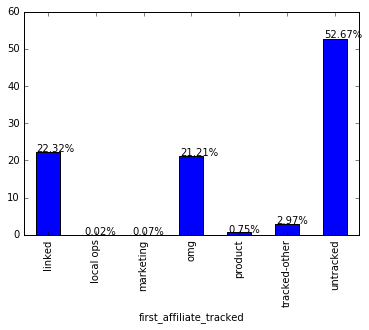

In [45]:
# first affiliate track
track = train.groupby(['first_affiliate_tracked']).size()
track = track.apply(lambda x: 100*x/float(track.sum()))
ax = track.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

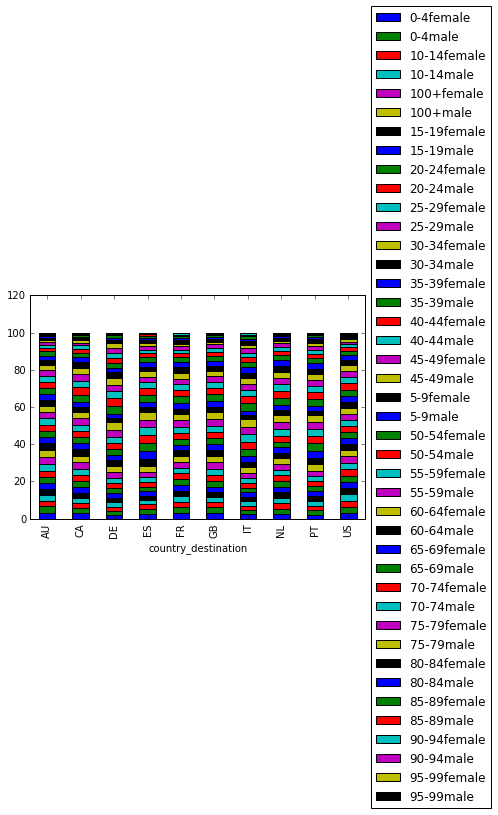

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

age_gender = pd.read_csv('age_gender_bkts.csv')
age_gender['group'] = age_gender[['age_bucket','gender']].apply(lambda x: ''.join(x),axis = 1)
grpby = age_gender.groupby(['country_destination','group'])['population_in_thousands'].sum()
g = grpby.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
g.unstack().plot(kind = 'bar',stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()